# Librerías

In [89]:
# Importación de librerías estándar de Python
import os
import random
import warnings

# Importación de librerías de terceros para manipulación y análisis de datos
import pandas as pd
# import numpy as np
from collections import Counter

# Importación de librerías de terceros para procesamiento de texto y expresiones regulares
import re
import unicodedata
from unidecode import unidecode
from fuzzywuzzy import process
from fuzzywuzzy import fuzz
from scipy.stats import ttest_ind

# Importación de librerías de terceros para visualización de datos
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import missingno as msno

# Importación de librerías para interactividad en Jupyter Notebooks
import ipywidgets as widgets

# Importación de itertools para combinaciones y productos cartesianos
from itertools import product

# Ignorar advertencias en la salida
warnings.filterwarnings("ignore")


# Cargar datos

In [90]:
# Ruta de la carpeta que contiene los archivos
path = "DATA/"
# Verificar si los archivos están en la carpeta
ficheros = [file for file in os.listdir(path) if os.path.isfile(os.path.join(path, file))]

dict_archivos = {}
print("Los archivos de la carpeta `data` son: ")
for file in ficheros:
    if file.endswith(('.csv')):
        print(file)
        if file.endswith('.csv'):
            df = pd.read_csv(path + file)
            dict_archivos[file] = df
print("-"*50)
nuevo_dict = {}
print("Los DataFrames con los que vamos a trabajar son:")
for k,v in dict_archivos.items():
    k_2 = "_".join(list(k.split ("_"))[1:-1])
    if len(str(k_2))<1: pass
    else:
        k_3= "df_" + k_2
        print (k_3)
        nuevo_dict[k_3] = v



Los archivos de la carpeta `data` son: 
df_EDA.csv
df_olist_dataset.csv
olist_customers_dataset.csv
olist_geolocation_dataset.csv
olist_orders_dataset.csv
olist_order_items_dataset.csv
olist_order_payments_dataset.csv
olist_order_reviews_dataset.csv
olist_products_dataset.csv
olist_sellers_dataset.csv
product_category_name_translation.csv
--------------------------------------------------
Los DataFrames con los que vamos a trabajar son:
df_olist
df_customers
df_geolocation
df_orders
df_order_items
df_order_payments
df_order_reviews
df_products
df_sellers
df_category_name


# Función de exploración inicial

In [91]:
def exploracion_inicial(df, tipo=None):
    if tipo == 'version_lite':
        print("¿Cuántas filas y columnas hay en el conjunto de datos?")
        num_filas, num_columnas = df.shape
        print("\tHay {:,} filas y {:,} columnas.".format(num_filas, num_columnas))

        print("¿Cuáles son las primeras dos filas del conjunto de datos?")
        display(df.head(2))
        print('\n########################################################################################')

    else:
        print("¿Cuántas filas y columnas hay en el conjunto de datos?")
        num_filas, num_columnas = df.shape
        print("\tHay {:,} filas y {:,} columnas.".format(num_filas, num_columnas))
        print('\n########################################################################################')

        print("¿Cuáles son las primeras cinco filas del conjunto de datos?")
        display(df.head())
        print('\n########################################################################################')

        print("¿Cuáles son las últimas cinco filas del conjunto de datos?")
        display(df.tail())
        print('\n########################################################################################')

        print("¿Cómo puedes obtener una muestra aleatoria de filas del conjunto de datos?")
        display(df.sample(n=5))
        print('\n########################################################################################')

        print("¿Cuáles son las columnas del conjunto de datos?")
        for i in list(df.columns):
            print('\t - ' + i)
        print('\n########################################################################################')

        print("¿Cuál es el tipo de datos de cada columna?")
        print(df.dtypes)
        print('\n########################################################################################')

        print("¿Cuántas columnas hay de cada tipo de datos?")
        print(df.dtypes.value_counts())
        print('\n########################################################################################')

        print("¿Cómo podríamos obtener información más completa sobre la estructura y el contenido del DataFrame?")
        print(df.info())
        print('\n########################################################################################')

        print("¿Cuántos valores únicos tiene cada columna?")
        print(df.nunique())
        print('\n########################################################################################')

        print("¿Cuáles son las estadísticas descriptivas básicas de todas las columnas?")
        display(df.describe(include='all').fillna(''))
        print('\n########################################################################################')

        print("¿Hay valores nulos en el conjunto de datos?")
        print(df.isnull().sum().sort_values(ascending=False))
        print('\n########################################################################################')

        print("¿Cuál es el porcentaje de valores nulos en cada columna?")
        print(round((df.isnull().sum() / len(df) * 100), 2).sort_values(ascending=False))
        print('\n########################################################################################')

        
        print("¿Cuántas filas duplicadas hay?")
        num_duplicados = df.duplicated().sum()
        if num_duplicados > 0:
            print(f"\tHay {num_duplicados:,} filas duplicadas.")
        else:
            print("\tNo hay filas duplicadas.")
        print('\n########################################################################################')


# df_geolocation

Este dataset contiene información sobre códigos postales brasileños y sus coordenadas de latitud/longitud. Interesante para trazar mapas y calcular distancias entre vendedores y clientes.

- geolocation_zip_code_prefix
- geolocation_lat
- geolocation_lng
- geolocation_city
- geolocation_state

In [92]:
df_geolocation = nuevo_dict['df_geolocation']
df_geolocation.head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


In [93]:
exploracion_inicial(df_geolocation, tipo = None)


¿Cuántas filas y columnas hay en el conjunto de datos?
	Hay 1,000,163 filas y 5 columnas.

########################################################################################
¿Cuáles son las primeras cinco filas del conjunto de datos?


,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP



########################################################################################
¿Cuáles son las últimas cinco filas del conjunto de datos?


,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
1000158,99950,-28.068639,-52.010705,tapejara,RS
1000159,99900,-27.877125,-52.224882,getulio vargas,RS
1000160,99950,-28.071855,-52.014716,tapejara,RS
1000161,99980,-28.388932,-51.846871,david canabarro,RS
1000162,99950,-28.070104,-52.018658,tapejara,RS



########################################################################################
¿Cómo puedes obtener una muestra aleatoria de filas del conjunto de datos?


,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
143168,5763,-23.639023,-46.757978,são paulo,SP
863838,83540,-25.201821,-49.315844,rio branco do sul,PR
723256,56306,-9.386508,-40.505955,petrolina,PE
293663,13160,-22.562702,-47.164721,artur nogueira,SP
851247,81330,-25.482852,-49.323307,curitiba,PR



########################################################################################
¿Cuáles son las columnas del conjunto de datos?
	 - geolocation_zip_code_prefix
	 - geolocation_lat
	 - geolocation_lng
	 - geolocation_city
	 - geolocation_state

########################################################################################
¿Cuál es el tipo de datos de cada columna?
geolocation_zip_code_prefix      int64
geolocation_lat                float64
geolocation_lng                float64
geolocation_city                object
geolocation_state               object
dtype: object

########################################################################################
¿Cuántas columnas hay de cada tipo de datos?
float64    2
object     2
int64      1
Name: count, dtype: int64

########################################################################################
¿Cómo podríamos obtener información más completa sobre la estructura y el contenido del DataFrame?
<class 'pandas.c

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
count,1000163.0,1000163.0,1000163.0,1000163,1000163
unique,,,,8011,27
top,,,,sao paulo,SP
freq,,,,135800,404268
mean,36574.166466,-21.176153,-46.390541,,
std,30549.33571,5.715866,4.269748,,
min,1001.0,-36.605374,-101.466766,,
25%,11075.0,-23.603546,-48.573172,,
50%,26530.0,-22.919377,-46.637879,,
75%,63504.0,-19.97962,-43.767709,,



########################################################################################
¿Hay valores nulos en el conjunto de datos?
geolocation_zip_code_prefix    0
geolocation_lat                0
geolocation_lng                0
geolocation_city               0
geolocation_state              0
dtype: int64

########################################################################################
¿Cuál es el porcentaje de valores nulos en cada columna?
geolocation_zip_code_prefix    0.0
geolocation_lat                0.0
geolocation_lng                0.0
geolocation_city               0.0
geolocation_state              0.0
dtype: float64

########################################################################################
¿Cuántas filas duplicadas hay?
	Hay 261,831 filas duplicadas.

########################################################################################


## Duplicados

In [94]:
print("Con duplicados: ")
print(df_geolocation.shape)
for column in df_geolocation.columns:
    print(f"{column}: {df_geolocation[column].nunique()}")
df_geo_duplicados =df_geolocation
df_geolocation= df_geo_duplicados.drop_duplicates(keep = 'last')

print("\nDespués de eliminar los duplicados: ")
print(df_geolocation.shape)

for column in df_geolocation.columns:
    print(f"{column}: {df_geolocation[column].nunique()}")


Con duplicados: 
(1000163, 5)
geolocation_zip_code_prefix: 19015
geolocation_lat: 717360
geolocation_lng: 717613
geolocation_city: 8011
geolocation_state: 27

Después de eliminar los duplicados: 
(738332, 5)
geolocation_zip_code_prefix: 19015
geolocation_lat: 717360
geolocation_lng: 717613
geolocation_city: 8011
geolocation_state: 27


# df_sellers

Este dataset relaciona los vendedores que se encargaron de los pedidos realizados en Olist.

- seller_id
- seller_zip_code_prefix
- seller_city
- seller_state

In [95]:
df_sellers = nuevo_dict['df_sellers']
df_sellers.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


In [96]:
exploracion_inicial_df_sellers= exploracion_inicial(df_sellers, tipo = None)
exploracion_inicial_df_sellers

¿Cuántas filas y columnas hay en el conjunto de datos?
	Hay 3,095 filas y 4 columnas.

########################################################################################
¿Cuáles son las primeras cinco filas del conjunto de datos?


,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP



########################################################################################
¿Cuáles son las últimas cinco filas del conjunto de datos?


,seller_id,seller_zip_code_prefix,seller_city,seller_state
3090,98dddbc4601dd4443ca174359b237166,87111,sarandi,PR
3091,f8201cab383e484733266d1906e2fdfa,88137,palhoca,SC
3092,74871d19219c7d518d0090283e03c137,4650,sao paulo,SP
3093,e603cf3fec55f8697c9059638d6c8eb5,96080,pelotas,RS
3094,9e25199f6ef7e7c347120ff175652c3b,12051,taubate,SP



########################################################################################
¿Cómo puedes obtener una muestra aleatoria de filas del conjunto de datos?


,seller_id,seller_zip_code_prefix,seller_city,seller_state
190,6d2f2e3b539480db1e0842b3a4e32e6e,7051,guarulhos,SP
1624,02f623a8eb246f3c5f7c2f96462654e6,18611,botucatu,SP
611,fe87f472055fbcf1d7e691c00b1560dc,13085,campinas,SP
2247,822bad9bc42b51213ba522fe87b7ab5d,88330,balneario camboriu,SC
2689,13074f016982ff2bd6c58ced8682f000,95705,bento goncalves,RS



########################################################################################
¿Cuáles son las columnas del conjunto de datos?
	 - seller_id
	 - seller_zip_code_prefix
	 - seller_city
	 - seller_state

########################################################################################
¿Cuál es el tipo de datos de cada columna?
seller_id                 object
seller_zip_code_prefix     int64
seller_city               object
seller_state              object
dtype: object

########################################################################################
¿Cuántas columnas hay de cada tipo de datos?
object    3
int64     1
Name: count, dtype: int64

########################################################################################
¿Cómo podríamos obtener información más completa sobre la estructura y el contenido del DataFrame?
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column                  

,seller_id,seller_zip_code_prefix,seller_city,seller_state
count,3095,3095.0,3095,3095
unique,3095,,611,23
top,3442f8959a84dea7ee197c632cb2df15,,sao paulo,SP
freq,1,,694,1849
mean,,32291.059451,,
std,,32713.45383,,
min,,1001.0,,
25%,,7093.5,,
50%,,14940.0,,
75%,,64552.5,,



########################################################################################
¿Hay valores nulos en el conjunto de datos?
seller_id                 0
seller_zip_code_prefix    0
seller_city               0
seller_state              0
dtype: int64

########################################################################################
¿Cuál es el porcentaje de valores nulos en cada columna?
seller_id                 0.0
seller_zip_code_prefix    0.0
seller_city               0.0
seller_state              0.0
dtype: float64

########################################################################################
¿Cuántas filas duplicadas hay?
	No hay filas duplicadas.

########################################################################################


# df_customers

Este dataset contiene información sobre los clientes y su ubicación. Sirve identificar a los clientes únicos en el conjunto de datos de pedidos (df_orders) y encontrar la ubicación de entrega de los pedidos.

Cada pedido se asigna a un customer_id único. Esto significa que el mismo cliente tendrá diferentes identificaciones para distintos pedidos. El customer_unique_id permite identificar a los clientes que realizaron compras repetidas en la tienda.

- customer_id
- customer_unique_id
- customer_zip_code_prefix
- customer_city
- customer_state

In [97]:
df_customers = nuevo_dict['df_customers']
df_customers.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [98]:
exploracion_inicial_df_customers= exploracion_inicial(df_customers, tipo = None)
exploracion_inicial_df_customers

¿Cuántas filas y columnas hay en el conjunto de datos?
	Hay 99,441 filas y 5 columnas.

########################################################################################
¿Cuáles son las primeras cinco filas del conjunto de datos?


,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP



########################################################################################
¿Cuáles son las últimas cinco filas del conjunto de datos?


,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
99436,17ddf5dd5d51696bb3d7c6291687be6f,1a29b476fee25c95fbafc67c5ac95cf8,3937,sao paulo,SP
99437,e7b71a9017aa05c9a7fd292d714858e8,d52a67c98be1cf6a5c84435bd38d095d,6764,taboao da serra,SP
99438,5e28dfe12db7fb50a4b2f691faecea5e,e9f50caf99f032f0bf3c55141f019d99,60115,fortaleza,CE
99439,56b18e2166679b8a959d72dd06da27f9,73c2643a0a458b49f58cea58833b192e,92120,canoas,RS
99440,274fa6071e5e17fe303b9748641082c8,84732c5050c01db9b23e19ba39899398,6703,cotia,SP



########################################################################################
¿Cómo puedes obtener una muestra aleatoria de filas del conjunto de datos?


,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
82194,84bf6a4346118c8306d16b593c15176e,15823b5826557e80b07c3d5dc611568e,21330,rio de janeiro,RJ
95408,5dac2f05fd146bd6f93452ece17711e5,df9bd60da4a8f8945d2b862aebd3d418,7097,guarulhos,SP
53664,4d5de06dc8934e25f9508d604dba6b6b,4f3eca3b402738d145bd7f1856462765,8240,sao paulo,SP
79712,3d8b8929401137df8ed8a123e9d6aa16,ff4136190ebc2a5c0bff70b569fe9180,15056,sao jose do rio preto,SP
41417,f8213934e14cc83d7fc89f6397d4a058,2a5a352188f018f8f0033a5c6f01d3f3,5758,sao paulo,SP



########################################################################################
¿Cuáles son las columnas del conjunto de datos?
	 - customer_id
	 - customer_unique_id
	 - customer_zip_code_prefix
	 - customer_city
	 - customer_state

########################################################################################
¿Cuál es el tipo de datos de cada columna?
customer_id                 object
customer_unique_id          object
customer_zip_code_prefix     int64
customer_city               object
customer_state              object
dtype: object

########################################################################################
¿Cuántas columnas hay de cada tipo de datos?
object    4
int64     1
Name: count, dtype: int64

########################################################################################
¿Cómo podríamos obtener información más completa sobre la estructura y el contenido del DataFrame?
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entri

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
count,99441,99441,99441.0,99441,99441
unique,99441,96096,,4119,27
top,06b8999e2fba1a1fbc88172c00ba8bc7,8d50f5eadf50201ccdcedfb9e2ac8455,,sao paulo,SP
freq,1,17,,15540,41746
mean,,,35137.474583,,
std,,,29797.938996,,
min,,,1003.0,,
25%,,,11347.0,,
50%,,,24416.0,,
75%,,,58900.0,,



########################################################################################
¿Hay valores nulos en el conjunto de datos?
customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64

########################################################################################
¿Cuál es el porcentaje de valores nulos en cada columna?
customer_id                 0.0
customer_unique_id          0.0
customer_zip_code_prefix    0.0
customer_city               0.0
customer_state              0.0
dtype: float64

########################################################################################
¿Cuántas filas duplicadas hay?
	No hay filas duplicadas.

########################################################################################


# df_orders

Este dataset es el principal, ya que con el order_id y customer_id nos abre acceso al resto de dataset.

- order_id
- customer_id
- order_status
- order_purchase_timestamp
- order_approved_at
- order_delivered_carrier_date
- order_delivered_customer_date
- order_estimated_delivery_date

In [99]:
df_orders= nuevo_dict['df_orders']
df_orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [100]:
exploracion_inicial_df_orders= exploracion_inicial(df_orders, tipo = None)
exploracion_inicial_df_orders

¿Cuántas filas y columnas hay en el conjunto de datos?
	Hay 99,441 filas y 8 columnas.

########################################################################################
¿Cuáles son las primeras cinco filas del conjunto de datos?


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00



########################################################################################
¿Cuáles son las últimas cinco filas del conjunto de datos?


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
99436,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-09 09:54:05,2017-03-10 11:18:03,2017-03-17 15:08:01,2017-03-28 00:00:00
99437,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02 00:00:00
99438,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27 00:00:00
99439,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15 00:00:00
99440,66dea50a8b16d9b4dee7af250b4be1a5,edb027a75a1449115f6b43211ae02a24,delivered,2018-03-08 20:57:30,2018-03-09 11:20:28,2018-03-09 22:11:59,2018-03-16 13:08:30,2018-04-03 00:00:00



########################################################################################
¿Cómo puedes obtener una muestra aleatoria de filas del conjunto de datos?


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
92718,b37e0e48a41066cd3053d9f68bb2e7b2,315f72cf8dfa6509d07b4809fdafbafb,delivered,2018-05-20 12:29:24,2018-05-20 12:58:45,2018-05-24 09:40:00,2018-06-01 15:58:54,2018-06-19 00:00:00
65102,0ca29d76f0116d46b7b5f364523feb38,57ed67c3bc4ffafc8b6f7ef565d4a8f7,delivered,2018-05-12 06:27:53,2018-05-15 03:55:59,2018-05-15 11:33:00,2018-05-22 19:42:53,2018-06-04 00:00:00
16881,8fa15cb7c33ccdab600d84fac69635de,40ebddb7102f8aa9061e437795447122,delivered,2018-04-18 12:46:02,2018-04-19 02:31:38,2018-04-19 19:21:51,2018-05-09 19:42:52,2018-05-16 00:00:00
579,62fcfe5da58296dface200da2e196fcd,02860b05257510a255778043ce042794,delivered,2017-05-19 14:12:50,2017-05-19 14:25:24,2017-05-22 12:47:36,2017-06-01 16:15:31,2017-06-12 00:00:00
25375,650f8b4597bac2e03e644e6e6d2a1122,ce23650d552b23150a2738a9d325e336,delivered,2017-11-22 14:27:47,2017-11-24 03:12:51,2017-11-29 17:48:57,2018-01-03 20:58:48,2017-12-11 00:00:00



########################################################################################
¿Cuáles son las columnas del conjunto de datos?
	 - order_id
	 - customer_id
	 - order_status
	 - order_purchase_timestamp
	 - order_approved_at
	 - order_delivered_carrier_date
	 - order_delivered_customer_date
	 - order_estimated_delivery_date

########################################################################################
¿Cuál es el tipo de datos de cada columna?
order_id                         object
customer_id                      object
order_status                     object
order_purchase_timestamp         object
order_approved_at                object
order_delivered_carrier_date     object
order_delivered_customer_date    object
order_estimated_delivery_date    object
dtype: object

########################################################################################
¿Cuántas columnas hay de cada tipo de datos?
object    8
Name: count, dtype: int64

#######################

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
count,99441,99441,99441,99441,99281,97658,96476,99441
unique,99441,99441,8,98875,90733,81018,95664,459
top,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2018-04-11 10:48:14,2018-02-27 04:31:10,2018-05-09 15:48:00,2018-05-08 23:38:46,2017-12-20 00:00:00
freq,1,1,96478,3,9,47,3,522



########################################################################################
¿Hay valores nulos en el conjunto de datos?
order_delivered_customer_date    2965
order_delivered_carrier_date     1783
order_approved_at                 160
order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_estimated_delivery_date       0
dtype: int64

########################################################################################
¿Cuál es el porcentaje de valores nulos en cada columna?
order_delivered_customer_date    2.98
order_delivered_carrier_date     1.79
order_approved_at                0.16
order_id                         0.00
customer_id                      0.00
order_status                     0.00
order_purchase_timestamp         0.00
order_estimated_delivery_date    0.00
dtype: float64

##################################################################################

## Nulos

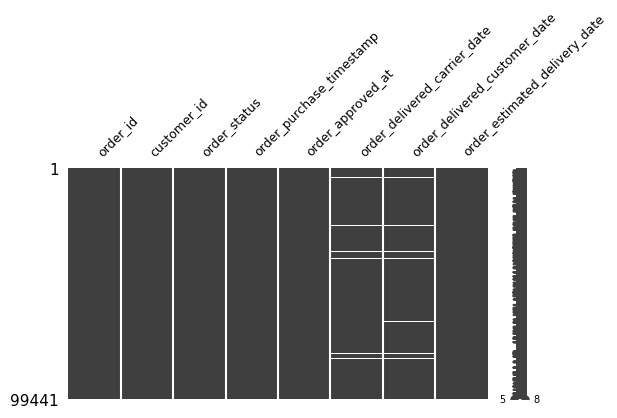

In [101]:
msno.matrix(df_orders, figsize=(6, 3), fontsize=9)
plt.show()

In [102]:
df_orders_nulos = df_orders

In [103]:
df_orders = df_orders_nulos.dropna()

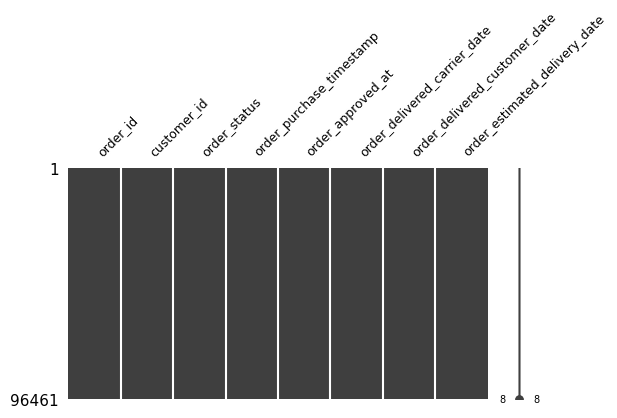

In [104]:
msno.matrix(df_orders, figsize=(6, 3), fontsize=9)
plt.show()

## Fecha procesada

Columnas con fechas:
 - order_purchase_timestamp
 - order_approved_at
 - order_delivered_carrier_date
 - order_delivered_customer_date
 - order_estimated_delivery_date

In [105]:
def fecha_procesada(df, variable_analisis):

    df[variable_analisis + '_procesada'] = pd.to_datetime(df[variable_analisis], format='%Y-%m-%d %H:%M:%S',errors='coerce')
    df[[variable_analisis, variable_analisis + '_procesada']].head()
    nulos = df[variable_analisis + '_procesada'].isnull().sum()
    print(f"Número de valores nulos en 'fecha_procesada': {nulos}") #0
    df[variable_analisis] = df[variable_analisis + '_procesada']
    df.drop(columns=[variable_analisis + '_procesada'], inplace=True)

In [106]:
fecha_procesada_purchase = fecha_procesada(df= df_orders, variable_analisis= 'order_purchase_timestamp')
fecha_procesada_purchase

Número de valores nulos en 'fecha_procesada': 0


In [107]:
fecha_procesada_approved_at = fecha_procesada(df= df_orders, variable_analisis= 'order_approved_at')
fecha_procesada_approved_at

Número de valores nulos en 'fecha_procesada': 0


In [108]:
fecha_procesada_delivered_carrier_date= fecha_procesada(df= df_orders, variable_analisis= 'order_delivered_carrier_date')
fecha_procesada_delivered_carrier_date

Número de valores nulos en 'fecha_procesada': 0


In [109]:
fecha_procesada_delivered_customer_date= fecha_procesada(df= df_orders, variable_analisis= 'order_delivered_customer_date')
fecha_procesada_delivered_customer_date

Número de valores nulos en 'fecha_procesada': 0


In [110]:
fecha_procesada_order_estimated_delivery_date = fecha_procesada(df= df_orders, variable_analisis= 'order_estimated_delivery_date')
fecha_procesada_order_estimated_delivery_date

Número de valores nulos en 'fecha_procesada': 0


In [111]:
exploracion_inicial_df_orders= exploracion_inicial(df_orders, tipo = None)
exploracion_inicial_df_orders

¿Cuántas filas y columnas hay en el conjunto de datos?
	Hay 96,461 filas y 8 columnas.

########################################################################################
¿Cuáles son las primeras cinco filas del conjunto de datos?


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26



########################################################################################
¿Cuáles son las últimas cinco filas del conjunto de datos?


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
99436,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-09 09:54:05,2017-03-10 11:18:03,2017-03-17 15:08:01,2017-03-28
99437,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02
99438,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27
99439,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15
99440,66dea50a8b16d9b4dee7af250b4be1a5,edb027a75a1449115f6b43211ae02a24,delivered,2018-03-08 20:57:30,2018-03-09 11:20:28,2018-03-09 22:11:59,2018-03-16 13:08:30,2018-04-03



########################################################################################
¿Cómo puedes obtener una muestra aleatoria de filas del conjunto de datos?


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
68300,6644c3cbafddb2afeadec90afcd51454,998061465ec6c530709ed291333da28c,delivered,2018-02-11 12:21:17,2018-02-11 12:30:29,2018-02-15 19:56:30,2018-02-19 21:43:48,2018-03-16
86125,42bfc988bbf084b1a7931003522a3ba6,90cd3c1335ea14527183b56a1e285809,delivered,2018-06-20 21:00:41,2018-06-21 03:17:52,2018-07-04 15:03:00,2018-07-10 17:44:33,2018-07-26
42447,9b3d13c2644e10e20020ccd7f3d40534,4f2bb54d04008d4f346c1e3f556cfcd3,delivered,2017-11-13 18:43:09,2017-11-13 18:55:59,2017-11-17 21:34:57,2017-11-21 21:28:06,2017-11-30
49287,dd8685cc92ade5d98e60812dfaffb087,b8458ef1e6b3b16e7cf526b9669b98c4,delivered,2018-06-09 08:34:37,2018-06-09 15:50:13,2018-06-13 13:53:00,2018-06-20 12:42:16,2018-07-11
95676,999b6fc072d02a9342c9e2d8ec687ab2,ae0e840cf718fffd1ebcc175caa4c229,delivered,2018-02-25 15:13:44,2018-02-27 04:31:05,2018-02-28 22:52:43,2018-03-06 00:15:51,2018-03-12



########################################################################################
¿Cuáles son las columnas del conjunto de datos?
	 - order_id
	 - customer_id
	 - order_status
	 - order_purchase_timestamp
	 - order_approved_at
	 - order_delivered_carrier_date
	 - order_delivered_customer_date
	 - order_estimated_delivery_date

########################################################################################
¿Cuál es el tipo de datos de cada columna?
order_id                                 object
customer_id                              object
order_status                             object
order_purchase_timestamp         datetime64[ns]
order_approved_at                datetime64[ns]
order_delivered_carrier_date     datetime64[ns]
order_delivered_customer_date    datetime64[ns]
order_estimated_delivery_date    datetime64[ns]
dtype: object

########################################################################################
¿Cuántas columnas hay de cada tipo de datos

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
count,96461,96461,96461,96461,96461,96461,96461,96461
unique,96461,96461,2,,,,,
top,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,,,,,
freq,1,1,96455,,,,,
mean,,,,2018-01-01 23:53:26.642249216,2018-01-02 10:10:06.480142336,2018-01-05 05:21:04.508827392,2018-01-14 13:17:13.228102400,2018-01-25 17:33:14.236012544
min,,,,2016-09-15 12:16:38,2016-09-15 12:16:38,2016-10-08 10:34:01,2016-10-11 13:46:32,2016-10-04 00:00:00
25%,,,,2017-09-14 09:28:28,2017-09-14 14:30:14,2017-09-18 16:52:19,2017-09-25 22:31:59,2017-10-05 00:00:00
50%,,,,2018-01-20 19:59:42,2018-01-22 13:49:00,2018-01-24 16:19:03,2018-02-02 19:50:56,2018-02-16 00:00:00
75%,,,,2018-05-05 18:33:24,2018-05-06 10:30:49,2018-05-08 14:33:00,2018-05-15 23:08:54,2018-05-28 00:00:00
max,,,,2018-08-29 15:00:37,2018-08-29 15:10:26,2018-09-11 19:48:28,2018-10-17 13:22:46,2018-10-25 00:00:00



########################################################################################
¿Hay valores nulos en el conjunto de datos?
order_id                         0
customer_id                      0
order_status                     0
order_purchase_timestamp         0
order_approved_at                0
order_delivered_carrier_date     0
order_delivered_customer_date    0
order_estimated_delivery_date    0
dtype: int64

########################################################################################
¿Cuál es el porcentaje de valores nulos en cada columna?
order_id                         0.0
customer_id                      0.0
order_status                     0.0
order_purchase_timestamp         0.0
order_approved_at                0.0
order_delivered_carrier_date     0.0
order_delivered_customer_date    0.0
order_estimated_delivery_date    0.0
dtype: float64

########################################################################################
¿Cuántas filas duplicadas

# df_order_items

Este dataset incluye información sobre los artículos comprados en cada pedido.

- order_id
- order_item_id
- product_id
- seller_id
- shipping_limit_date
- price
- freight_value

In [112]:
df_order_items= nuevo_dict['df_order_items']
df_order_items.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


Cada artículo tiene el costo de envío calculado según sus medidas y peso. Para obtener el costo total de envío de cada pedido, solo necesitas sumar el freight_value y el price de cada producto:

Precio de los productos pedido = 21.33 * 3 = 63.99

Costo de envío del pedido = 15.1 * 3 = 45.3

Valor del pedido total = 63.99 + 45.30 = 109.29

In [113]:
df_order_items[df_order_items['order_id'] == '00143d0f86d6fbd9f9b38ab440ac16f5']

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
32,00143d0f86d6fbd9f9b38ab440ac16f5,1,e95ee6822b66ac6058e2e4aff656071a,a17f621c590ea0fab3d5d883e1630ec6,2017-10-20 16:07:52,21.33,15.1
33,00143d0f86d6fbd9f9b38ab440ac16f5,2,e95ee6822b66ac6058e2e4aff656071a,a17f621c590ea0fab3d5d883e1630ec6,2017-10-20 16:07:52,21.33,15.1
34,00143d0f86d6fbd9f9b38ab440ac16f5,3,e95ee6822b66ac6058e2e4aff656071a,a17f621c590ea0fab3d5d883e1630ec6,2017-10-20 16:07:52,21.33,15.1


In [114]:
exploracion_inicial_df_order_items= exploracion_inicial(df_order_items, tipo = None)
exploracion_inicial_df_order_items

¿Cuántas filas y columnas hay en el conjunto de datos?
	Hay 112,650 filas y 7 columnas.

########################################################################################
¿Cuáles son las primeras cinco filas del conjunto de datos?


,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14



########################################################################################
¿Cuáles son las últimas cinco filas del conjunto de datos?


,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
112645,fffc94f6ce00a00581880bf54a75a037,1,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-05-02 04:11:01,299.99,43.41
112646,fffcd46ef2263f404302a634eb57f7eb,1,32e07fd915822b0765e448c4dd74c828,f3c38ab652836d21de61fb8314b69182,2018-07-20 04:31:48,350.00,36.53
112647,fffce4705a9662cd70adb13d4a31832d,1,72a30483855e2eafc67aee5dc2560482,c3cfdc648177fdbbbb35635a37472c53,2017-10-30 17:14:25,99.90,16.95
112648,fffe18544ffabc95dfada21779c9644f,1,9c422a519119dcad7575db5af1ba540e,2b3e4a2a3ea8e01938cabda2a3e5cc79,2017-08-21 00:04:32,55.99,8.72
112649,fffe41c64501cc87c801fd61db3f6244,1,350688d9dc1e75ff97be326363655e01,f7ccf836d21b2fb1de37564105216cc1,2018-06-12 17:10:13,43.00,12.79



########################################################################################
¿Cómo puedes obtener una muestra aleatoria de filas del conjunto de datos?


,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
51169,744c590b667776f5108a23623d7e5b91,1,d49f9f12cae797620ffae81f5cdf0f79,82bd0703a4aefd6b599e5bfdaed378fb,2017-07-24 16:30:09,26.9,11.85
45067,66768c430bdcf5b52888fdcbd5877992,1,f71050e65776861c8c3ec7a2d2b0194c,53e4c6e0f4312d4d2107a8c9cddf45cd,2017-09-15 20:15:25,72.0,14.25
17812,28d30364312f8bf1c89aff3a4816eb53,1,dce24381876a1d59ccc9d00d3dbade56,259f7b5e6e482c230e5bfaa670b6bb8f,2018-05-15 23:31:39,78.9,46.63
92149,d11dabeea9817f9d7233bf03790d2f25,1,99a4788cb24856965c36a24e339b6058,4a3ca9315b744ce9f8e9374361493884,2017-07-04 18:50:21,89.9,15.38
44165,646410b7c77f0bae163c4d4cbe4d78de,1,99a4788cb24856965c36a24e339b6058,4a3ca9315b744ce9f8e9374361493884,2017-08-02 22:35:17,89.9,12.13



########################################################################################
¿Cuáles son las columnas del conjunto de datos?
	 - order_id
	 - order_item_id
	 - product_id
	 - seller_id
	 - shipping_limit_date
	 - price
	 - freight_value

########################################################################################
¿Cuál es el tipo de datos de cada columna?
order_id                object
order_item_id            int64
product_id              object
seller_id               object
shipping_limit_date     object
price                  float64
freight_value          float64
dtype: object

########################################################################################
¿Cuántas columnas hay de cada tipo de datos?
object     4
float64    2
int64      1
Name: count, dtype: int64

########################################################################################
¿Cómo podríamos obtener información más completa sobre la estructura y el contenido del DataFram

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
count,112650,112650.0,112650,112650,112650,112650.0,112650.0
unique,98666,,32951,3095,93318,,
top,8272b63d03f5f79c56e9e4120aec44ef,,aca2eb7d00ea1a7b8ebd4e68314663af,6560211a19b47992c3666cc44a7e94c0,2017-07-21 18:25:23,,
freq,21,,527,2033,21,,
mean,,1.197834,,,,120.653739,19.99032
std,,0.705124,,,,183.633928,15.806405
min,,1.0,,,,0.85,0.0
25%,,1.0,,,,39.9,13.08
50%,,1.0,,,,74.99,16.26
75%,,1.0,,,,134.9,21.15



########################################################################################
¿Hay valores nulos en el conjunto de datos?
order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64

########################################################################################
¿Cuál es el porcentaje de valores nulos en cada columna?
order_id               0.0
order_item_id          0.0
product_id             0.0
seller_id              0.0
shipping_limit_date    0.0
price                  0.0
freight_value          0.0
dtype: float64

########################################################################################
¿Cuántas filas duplicadas hay?
	No hay filas duplicadas.

########################################################################################


## Fecha procesada

In [115]:
fecha_procesada_limit_date= fecha_procesada(df= df_order_items, variable_analisis= 'shipping_limit_date')
fecha_procesada_limit_date

Número de valores nulos en 'fecha_procesada': 0


In [116]:
exploracion_inicial_df_order_items= exploracion_inicial(df_order_items, tipo = None)
exploracion_inicial_df_order_items

¿Cuántas filas y columnas hay en el conjunto de datos?
	Hay 112,650 filas y 7 columnas.

########################################################################################
¿Cuáles son las primeras cinco filas del conjunto de datos?


,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14



########################################################################################
¿Cuáles son las últimas cinco filas del conjunto de datos?


,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
112645,fffc94f6ce00a00581880bf54a75a037,1,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-05-02 04:11:01,299.99,43.41
112646,fffcd46ef2263f404302a634eb57f7eb,1,32e07fd915822b0765e448c4dd74c828,f3c38ab652836d21de61fb8314b69182,2018-07-20 04:31:48,350.00,36.53
112647,fffce4705a9662cd70adb13d4a31832d,1,72a30483855e2eafc67aee5dc2560482,c3cfdc648177fdbbbb35635a37472c53,2017-10-30 17:14:25,99.90,16.95
112648,fffe18544ffabc95dfada21779c9644f,1,9c422a519119dcad7575db5af1ba540e,2b3e4a2a3ea8e01938cabda2a3e5cc79,2017-08-21 00:04:32,55.99,8.72
112649,fffe41c64501cc87c801fd61db3f6244,1,350688d9dc1e75ff97be326363655e01,f7ccf836d21b2fb1de37564105216cc1,2018-06-12 17:10:13,43.00,12.79



########################################################################################
¿Cómo puedes obtener una muestra aleatoria de filas del conjunto de datos?


,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
4436,0a01aa0d779fc923be4cc5505b0c6dd4,1,2c925b58c178637d60168ac80cf7f836,46dc3b2cc0980fb8ec44634e21d2718e,2018-06-20 12:31:10,99.99,16.89
78774,b32fad437a7904a2ddcafb3f0d23fed3,1,ed5666106b8fb47b57c4b2c5f67a755b,2addf05f476d0637864454e93ba673d5,2017-11-03 10:29:49,209.00,17.90
82489,bb5ce7970b8f80016d81488da88bd924,1,fb9c4133006cdb80c0a96dd36310aac4,4d0041cdbe51b4617d95c70b19decc74,2018-05-18 09:55:16,335.90,20.23
60267,895ab968e7bb0d5659d16cd74cd1650c,3,5ddab10d5e0a23acb99acf56b62b3276,3d0cd21d41671c46f82cd11176bf7277,2017-08-14 20:43:31,83.80,5.12
25556,3a1ce8f7e9dfdcc0446a9f29f1457f52,1,e7cc48a9daff5436f63d3aad9426f28b,53243585a1d6dc2643021fd1853d8905,2018-08-16 17:55:15,199.00,25.74



########################################################################################
¿Cuáles son las columnas del conjunto de datos?
	 - order_id
	 - order_item_id
	 - product_id
	 - seller_id
	 - shipping_limit_date
	 - price
	 - freight_value

########################################################################################
¿Cuál es el tipo de datos de cada columna?
order_id                       object
order_item_id                   int64
product_id                     object
seller_id                      object
shipping_limit_date    datetime64[ns]
price                         float64
freight_value                 float64
dtype: object

########################################################################################
¿Cuántas columnas hay de cada tipo de datos?
object            3
float64           2
int64             1
datetime64[ns]    1
Name: count, dtype: int64

########################################################################################
¿Cómo 

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
count,112650,112650.0,112650,112650,112650,112650.0,112650.0
unique,98666,,32951,3095,,,
top,8272b63d03f5f79c56e9e4120aec44ef,,aca2eb7d00ea1a7b8ebd4e68314663af,6560211a19b47992c3666cc44a7e94c0,,,
freq,21,,527,2033,,,
mean,,1.197834,,,2018-01-07 15:36:52.192685312,120.653739,19.99032
min,,1.0,,,2016-09-19 00:15:34,0.85,0.0
25%,,1.0,,,2017-09-20 20:57:27.500000,39.9,13.08
50%,,1.0,,,2018-01-26 13:59:35,74.99,16.26
75%,,1.0,,,2018-05-10 14:34:00.750000128,134.9,21.15
max,,21.0,,,2020-04-09 22:35:08,6735.0,409.68



########################################################################################
¿Hay valores nulos en el conjunto de datos?
order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64

########################################################################################
¿Cuál es el porcentaje de valores nulos en cada columna?
order_id               0.0
order_item_id          0.0
product_id             0.0
seller_id              0.0
shipping_limit_date    0.0
price                  0.0
freight_value          0.0
dtype: float64

########################################################################################
¿Cuántas filas duplicadas hay?
	No hay filas duplicadas.

########################################################################################


# df_products

Este dataset tiene información sobre los productos vendidos por Olist.
 - product_id
- product_category_name
- product_name_lenght
- product_description_lenght
- product_photos_qty
- product_weight_g
- product_length_cm
- product_height_cm
- product_width_cm

In [117]:
df_products= nuevo_dict['df_products']
df_products.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [118]:
exploracion_inicial_df_products = exploracion_inicial(df_products , tipo = None)
exploracion_inicial_df_products

¿Cuántas filas y columnas hay en el conjunto de datos?
	Hay 32,951 filas y 9 columnas.

########################################################################################
¿Cuáles son las primeras cinco filas del conjunto de datos?


,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0



########################################################################################
¿Cuáles son las últimas cinco filas del conjunto de datos?


,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
32946,a0b7d5a992ccda646f2d34e418fff5a0,moveis_decoracao,45.0,67.0,2.0,12300.0,40.0,40.0,40.0
32947,bf4538d88321d0fd4412a93c974510e6,construcao_ferramentas_iluminacao,41.0,971.0,1.0,1700.0,16.0,19.0,16.0
32948,9a7c6041fa9592d9d9ef6cfe62a71f8c,cama_mesa_banho,50.0,799.0,1.0,1400.0,27.0,7.0,27.0
32949,83808703fc0706a22e264b9d75f04a2e,informatica_acessorios,60.0,156.0,2.0,700.0,31.0,13.0,20.0
32950,106392145fca363410d287a815be6de4,cama_mesa_banho,58.0,309.0,1.0,2083.0,12.0,2.0,7.0



########################################################################################
¿Cómo puedes obtener una muestra aleatoria de filas del conjunto de datos?


,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
10204,c3f0567155098730c30259bf19b54fdc,bebes,57.0,345.0,2.0,200.0,20.0,10.0,20.0
9285,666a984f022bec9d8c30060c4bf355c7,informatica_acessorios,43.0,1352.0,1.0,3050.0,23.0,17.0,20.0
17243,0269bdfd3a4f3d384753cbadc1d742be,utilidades_domesticas,20.0,630.0,1.0,350.0,17.0,28.0,11.0
9386,d537e54e990d95194a5733e79f1af1aa,esporte_lazer,51.0,2047.0,1.0,50.0,20.0,20.0,20.0
17551,5dcceb4689c06ac693117bc4296986ef,cama_mesa_banho,59.0,679.0,1.0,1000.0,28.0,14.0,16.0



########################################################################################
¿Cuáles son las columnas del conjunto de datos?
	 - product_id
	 - product_category_name
	 - product_name_lenght
	 - product_description_lenght
	 - product_photos_qty
	 - product_weight_g
	 - product_length_cm
	 - product_height_cm
	 - product_width_cm

########################################################################################
¿Cuál es el tipo de datos de cada columna?
product_id                     object
product_category_name          object
product_name_lenght           float64
product_description_lenght    float64
product_photos_qty            float64
product_weight_g              float64
product_length_cm             float64
product_height_cm             float64
product_width_cm              float64
dtype: object

########################################################################################
¿Cuántas columnas hay de cada tipo de datos?
float64    7
object     2
Name: c

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,32951,32341,32341.0,32341.0,32341.0,32949.0,32949.0,32949.0,32949.0
unique,32951,73,,,,,,,
top,1e9e8ef04dbcff4541ed26657ea517e5,cama_mesa_banho,,,,,,,
freq,1,3029,,,,,,,
mean,,,48.476949,771.495285,2.188986,2276.472488,30.815078,16.937661,23.196728
std,,,10.245741,635.115225,1.736766,4282.038731,16.914458,13.637554,12.079047
min,,,5.0,4.0,1.0,0.0,7.0,2.0,6.0
25%,,,42.0,339.0,1.0,300.0,18.0,8.0,15.0
50%,,,51.0,595.0,1.0,700.0,25.0,13.0,20.0
75%,,,57.0,972.0,3.0,1900.0,38.0,21.0,30.0



########################################################################################
¿Hay valores nulos en el conjunto de datos?
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
product_id                      0
dtype: int64

########################################################################################
¿Cuál es el porcentaje de valores nulos en cada columna?
product_category_name         1.85
product_name_lenght           1.85
product_description_lenght    1.85
product_photos_qty            1.85
product_weight_g              0.01
product_length_cm             0.01
product_height_cm             0.01
product_width_cm              0.01
product_id                    0.00
dtype: float64

#####################################################################

## Nulos

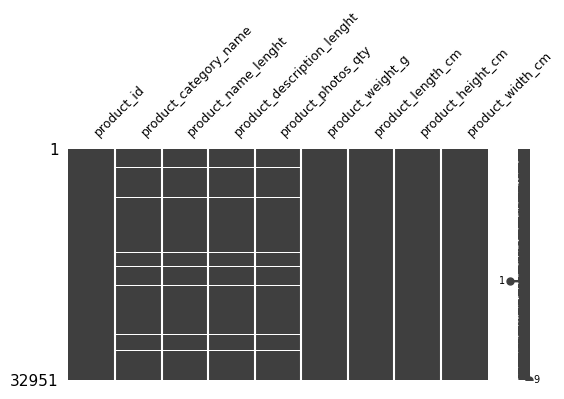

In [119]:
msno.matrix(df_products , figsize=(6, 3), fontsize=9)
plt.show()

In [120]:
df_products[df_products['product_category_name'].isnull()]

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
105,a41e356c76fab66334f36de622ecbd3a,NaN,NaN,NaN,NaN,650.0,17.0,14.0,12.0
128,d8dee61c2034d6d075997acef1870e9b,NaN,NaN,NaN,NaN,300.0,16.0,7.0,20.0
145,56139431d72cd51f19eb9f7dae4d1617,NaN,NaN,NaN,NaN,200.0,20.0,20.0,20.0
154,46b48281eb6d663ced748f324108c733,NaN,NaN,NaN,NaN,18500.0,41.0,30.0,41.0
197,5fb61f482620cb672f5e586bb132eae9,NaN,NaN,NaN,NaN,300.0,35.0,7.0,12.0
...,...,...,...,...,...,...,...,...,...
32515,b0a0c5dd78e644373b199380612c350a,NaN,NaN,NaN,NaN,1800.0,30.0,20.0,70.0
32589,10dbe0fbaa2c505123c17fdc34a63c56,NaN,NaN,NaN,NaN,800.0,30.0,10.0,23.0
32616,bd2ada37b58ae94cc838b9c0569fecd8,NaN,NaN,NaN,NaN,200.0,21.0,8.0,16.0
32772,fa51e914046aab32764c41356b9d4ea4,NaN,NaN,NaN,NaN,1300.0,45.0,16.0,45.0


Se comprueba que los productos sin nombre de categoría asignada existe en otros datasets, así que se creala categoría Other para éstos.

In [121]:
productos_nulos = df_products[df_products['product_category_name'].isnull()]['product_id']

In [122]:
df_order_items[df_order_items['product_id'].isin(productos_nulos)]

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
123,0046e1d57f4c07c8c92ab26be8c3dfc0,1,ff6caf9340512b8bf6d2a2a6df032cfa,38e6dada03429a47197d5d584d793b41,2017-10-02 15:49:17,7.79,7.78
125,00482f2670787292280e0a8153d82467,1,a9c404971d1a5b1cbc2e4070e02731fd,702835e4b785b67a084280efca355756,2017-02-17 16:18:07,7.60,10.96
132,004f5d8f238e8908e6864b874eda3391,1,5a848e4ab52fd5445cdc07aab1c40e48,c826c40d7b19f62a09e2d7c5e7295ee2,2018-03-06 09:29:25,122.99,15.61
142,0057199db02d1a5ef41bacbf41f8f63b,1,41eee23c25f7a574dfaf8d5c151dbb12,e5a3438891c0bfdb9394643f95273d8e,2018-01-25 09:07:51,20.30,16.79
171,006cb7cafc99b29548d4f412c7f9f493,1,e10758160da97891c2fdcbc35f0f031d,323ce52b5b81df2cd804b017b7f09aa7,2018-02-22 13:35:28,56.00,14.14
...,...,...,...,...,...,...,...
112306,ff24fec69b7f3d30f9dc1ab3aee7c179,1,5a848e4ab52fd5445cdc07aab1c40e48,c826c40d7b19f62a09e2d7c5e7295ee2,2018-02-01 02:40:12,122.99,15.61
112333,ff3024474be86400847879103757d1fd,1,f9b1795281ce51b1cf39ef6d101ae8ab,3771c85bac139d2344864ede5d9341e3,2017-11-21 03:55:39,39.90,9.94
112350,ff3a45ee744a7c1f8096d2e72c1a23e4,1,b61d1388a17e3f547d2bc218df02335b,07017df32dc5f2f1d2801e579548d620,2017-05-10 10:15:19,139.00,21.42
112438,ff7b636282b98e0aa524264b295ed928,1,431df35e52c10451171d8037482eeb43,6cd68b3ed6d59aaa9fece558ad360c0a,2018-02-22 15:35:35,49.90,15.11


In [123]:
df_products_nulos =  df_products

In [124]:
df_products['product_category_name'] = df_products['product_category_name'].fillna('Other') #
df_products['product_category_name'].isnull().sum()


0

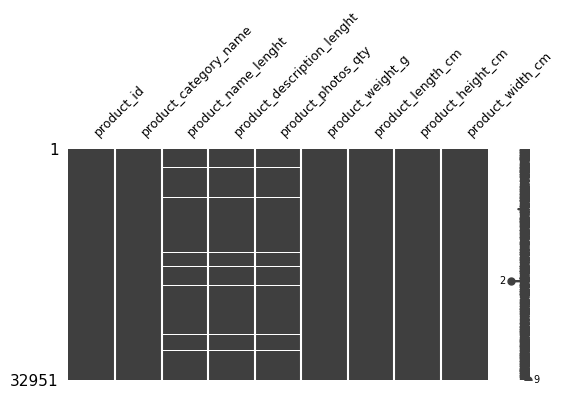

In [125]:
msno.matrix(df_products , figsize=(6, 3), fontsize=9)
plt.show()

 `df_category_name` contiene los nombres de categoría en inglés

In [126]:
exploracion_inicial_df_products = exploracion_inicial(df_products , tipo = None)
exploracion_inicial_df_products

¿Cuántas filas y columnas hay en el conjunto de datos?
	Hay 32,951 filas y 9 columnas.

########################################################################################
¿Cuáles son las primeras cinco filas del conjunto de datos?


,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0



########################################################################################
¿Cuáles son las últimas cinco filas del conjunto de datos?


,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
32946,a0b7d5a992ccda646f2d34e418fff5a0,moveis_decoracao,45.0,67.0,2.0,12300.0,40.0,40.0,40.0
32947,bf4538d88321d0fd4412a93c974510e6,construcao_ferramentas_iluminacao,41.0,971.0,1.0,1700.0,16.0,19.0,16.0
32948,9a7c6041fa9592d9d9ef6cfe62a71f8c,cama_mesa_banho,50.0,799.0,1.0,1400.0,27.0,7.0,27.0
32949,83808703fc0706a22e264b9d75f04a2e,informatica_acessorios,60.0,156.0,2.0,700.0,31.0,13.0,20.0
32950,106392145fca363410d287a815be6de4,cama_mesa_banho,58.0,309.0,1.0,2083.0,12.0,2.0,7.0



########################################################################################
¿Cómo puedes obtener una muestra aleatoria de filas del conjunto de datos?


,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
13648,9a7ee66bbed1b9fa5e3341882c6d74b3,brinquedos,44.0,755.0,3.0,1000.0,21.0,25.0,32.0
21484,67f1a036affe9a75b73dfddf0386893a,beleza_saude,58.0,414.0,1.0,30000.0,55.0,75.0,61.0
27483,f306d4917efd6c5a46bbb72b640313da,bebes,45.0,759.0,3.0,425.0,25.0,19.0,17.0
11500,1277ea8bc2cac6f6e5738a15f8d90e8a,esporte_lazer,46.0,734.0,1.0,1150.0,21.0,18.0,15.0
10653,8634ba98d69440265e955814c3e4cde1,cool_stuff,63.0,2267.0,8.0,400.0,17.0,9.0,12.0



########################################################################################
¿Cuáles son las columnas del conjunto de datos?
	 - product_id
	 - product_category_name
	 - product_name_lenght
	 - product_description_lenght
	 - product_photos_qty
	 - product_weight_g
	 - product_length_cm
	 - product_height_cm
	 - product_width_cm

########################################################################################
¿Cuál es el tipo de datos de cada columna?
product_id                     object
product_category_name          object
product_name_lenght           float64
product_description_lenght    float64
product_photos_qty            float64
product_weight_g              float64
product_length_cm             float64
product_height_cm             float64
product_width_cm              float64
dtype: object

########################################################################################
¿Cuántas columnas hay de cada tipo de datos?
float64    7
object     2
Name: c

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,32951,32951,32341.0,32341.0,32341.0,32949.0,32949.0,32949.0,32949.0
unique,32951,74,,,,,,,
top,1e9e8ef04dbcff4541ed26657ea517e5,cama_mesa_banho,,,,,,,
freq,1,3029,,,,,,,
mean,,,48.476949,771.495285,2.188986,2276.472488,30.815078,16.937661,23.196728
std,,,10.245741,635.115225,1.736766,4282.038731,16.914458,13.637554,12.079047
min,,,5.0,4.0,1.0,0.0,7.0,2.0,6.0
25%,,,42.0,339.0,1.0,300.0,18.0,8.0,15.0
50%,,,51.0,595.0,1.0,700.0,25.0,13.0,20.0
75%,,,57.0,972.0,3.0,1900.0,38.0,21.0,30.0



########################################################################################
¿Hay valores nulos en el conjunto de datos?
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
product_id                      0
product_category_name           0
dtype: int64

########################################################################################
¿Cuál es el porcentaje de valores nulos en cada columna?
product_name_lenght           1.85
product_description_lenght    1.85
product_photos_qty            1.85
product_weight_g              0.01
product_length_cm             0.01
product_height_cm             0.01
product_width_cm              0.01
product_id                    0.00
product_category_name         0.00
dtype: float64

#####################################################################

# df_order_payments

Este dataset incluye información sobre las opciones de pago utilizadas en los pedidos.

- order_id
- payment_sequential
- payment_type
- payment_installments
- payment_value

In [127]:
df_order_payments = nuevo_dict['df_order_payments']
df_order_payments.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [128]:
exploracion_inicial_df_order_payments  = exploracion_inicial(df_order_payments  , tipo = None)
exploracion_inicial_df_order_payments

¿Cuántas filas y columnas hay en el conjunto de datos?
	Hay 103,886 filas y 5 columnas.

########################################################################################
¿Cuáles son las primeras cinco filas del conjunto de datos?


,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45



########################################################################################
¿Cuáles son las últimas cinco filas del conjunto de datos?


,order_id,payment_sequential,payment_type,payment_installments,payment_value
103881,0406037ad97740d563a178ecc7a2075c,1,boleto,1,363.31
103882,7b905861d7c825891d6347454ea7863f,1,credit_card,2,96.80
103883,32609bbb3dd69b3c066a6860554a77bf,1,credit_card,1,47.77
103884,b8b61059626efa996a60be9bb9320e10,1,credit_card,5,369.54
103885,28bbae6599b09d39ca406b747b6632b1,1,boleto,1,191.58



########################################################################################
¿Cómo puedes obtener una muestra aleatoria de filas del conjunto de datos?


,order_id,payment_sequential,payment_type,payment_installments,payment_value
53962,87dc3fd7007c4660f83c57f210061b28,1,credit_card,4,303.68
94812,a0489f813262544cff043d56396759b3,1,credit_card,1,76.68
84706,2b101e802b6712f2fc129966a2c518fd,3,voucher,1,15.04
23934,aab77f6b8eb88bca78803173c935407c,1,credit_card,1,287.40
82153,189a789106a7456d348ba7ebf920586c,1,credit_card,4,205.49



########################################################################################
¿Cuáles son las columnas del conjunto de datos?
	 - order_id
	 - payment_sequential
	 - payment_type
	 - payment_installments
	 - payment_value

########################################################################################
¿Cuál es el tipo de datos de cada columna?
order_id                 object
payment_sequential        int64
payment_type             object
payment_installments      int64
payment_value           float64
dtype: object

########################################################################################
¿Cuántas columnas hay de cada tipo de datos?
object     2
int64      2
float64    1
Name: count, dtype: int64

########################################################################################
¿Cómo podríamos obtener información más completa sobre la estructura y el contenido del DataFrame?
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to

,order_id,payment_sequential,payment_type,payment_installments,payment_value
count,103886,103886.0,103886,103886.0,103886.0
unique,99440,,5,,
top,fa65dad1b0e818e3ccc5cb0e39231352,,credit_card,,
freq,29,,76795,,
mean,,1.092679,,2.853349,154.10038
std,,0.706584,,2.687051,217.494064
min,,1.0,,0.0,0.0
25%,,1.0,,1.0,56.79
50%,,1.0,,1.0,100.0
75%,,1.0,,4.0,171.8375



########################################################################################
¿Hay valores nulos en el conjunto de datos?
order_id                0
payment_sequential      0
payment_type            0
payment_installments    0
payment_value           0
dtype: int64

########################################################################################
¿Cuál es el porcentaje de valores nulos en cada columna?
order_id                0.0
payment_sequential      0.0
payment_type            0.0
payment_installments    0.0
payment_value           0.0
dtype: float64

########################################################################################
¿Cuántas filas duplicadas hay?
	No hay filas duplicadas.

########################################################################################


Para obtener el pago total por pedido, necesitamos sumar el valor de payment_value de cada payment_sequential para el mismo order_id.

En este ejemplo:

Pago total del pedido = 2.99 + 19.00 + 11.10 = 33.09

In [129]:
df_order_payments[df_order_payments['order_id'] == 'b80ba0f0c3d2a63feac0116f533cc6a9']

,order_id,payment_sequential,payment_type,payment_installments,payment_value
275,b80ba0f0c3d2a63feac0116f533cc6a9,3,voucher,1,2.99
58459,b80ba0f0c3d2a63feac0116f533cc6a9,2,voucher,1,19.00
81970,b80ba0f0c3d2a63feac0116f533cc6a9,1,credit_card,1,11.10


Para obtener el pago total por pedido, necesitamos sumar el valor de payment_value de cada payment_sequential para el mismo order_id.

En este ejemplo:

Pago total del pedido = 2.99 + 19.00 + 11.10 = 33.09

In [130]:
df_order_payments[df_order_payments['order_id'] == 'b80ba0f0c3d2a63feac0116f533cc6a9']

,order_id,payment_sequential,payment_type,payment_installments,payment_value
275,b80ba0f0c3d2a63feac0116f533cc6a9,3,voucher,1,2.99
58459,b80ba0f0c3d2a63feac0116f533cc6a9,2,voucher,1,19.00
81970,b80ba0f0c3d2a63feac0116f533cc6a9,1,credit_card,1,11.10


# df_order_reviews

Este dataset incluye información sobre las reseñas realizadas por los clientes.

Una vez que el cliente recibe el producto, o cuando se cumple la fecha estimada de entrega, se le envía una encuesta de satisfacción por correo electrónico, donde puede calificar su experiencia de compra y escribir comentarios.

- review_id
- order_id
- review_score
- review_comment_title
- review_comment_message
- review_creation_date
- review_answer_timestamp

In [131]:
df_order_reviews = nuevo_dict['df_order_reviews']
df_order_reviews.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


In [132]:
exploracion_inicial_df_order_reviews = exploracion_inicial(df_order_reviews  , tipo = None)
exploracion_inicial_df_order_reviews

¿Cuántas filas y columnas hay en el conjunto de datos?
	Hay 99,224 filas y 7 columnas.

########################################################################################
¿Cuáles son las primeras cinco filas del conjunto de datos?


,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53



########################################################################################
¿Cuáles son las últimas cinco filas del conjunto de datos?


,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
99219,574ed12dd733e5fa530cfd4bbf39d7c9,2a8c23fee101d4d5662fa670396eb8da,5,NaN,NaN,2018-07-07 00:00:00,2018-07-14 17:18:30
99220,f3897127253a9592a73be9bdfdf4ed7a,22ec9f0669f784db00fa86d035cf8602,5,NaN,NaN,2017-12-09 00:00:00,2017-12-11 20:06:42
99221,b3de70c89b1510c4cd3d0649fd302472,55d4004744368f5571d1f590031933e4,5,NaN,"Excelente mochila, entrega super rápida. Super...",2018-03-22 00:00:00,2018-03-23 09:10:43
99222,1adeb9d84d72fe4e337617733eb85149,7725825d039fc1f0ceb7635e3f7d9206,4,NaN,NaN,2018-07-01 00:00:00,2018-07-02 12:59:13
99223,efe49f1d6f951dd88b51e6ccd4cc548f,90531360ecb1eec2a1fbb265a0db0508,1,NaN,"meu produto chegou e ja tenho que devolver, po...",2017-07-03 00:00:00,2017-07-03 21:01:49



########################################################################################
¿Cómo puedes obtener una muestra aleatoria de filas del conjunto de datos?


,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
78342,df281bb795b449d85b496669c750b2e2,35e43ade963a5aeb52cb24bb5df33ddc,3,NaN,NaN,2017-08-31 00:00:00,2017-09-01 00:57:05
39139,c8884920d9914921cf641b539f712929,6b84d210abf237ef478dd4f1b0f4c10b,5,Lindooo...minha filha amo,Super recomendoooo,2018-06-13 00:00:00,2018-06-14 14:37:11
45231,c1a26cc1e5404f61344cd984af4c6cbc,bee2b7c6076a73bf21b6fef8fccd6691,3,NaN,O produto é bom.,2017-10-24 00:00:00,2017-10-24 14:48:22
2601,0385918df6cb6429d794d2ade9556103,c1e00da044e0d7297a2f8cdd0a048fc9,5,NaN,NaN,2017-04-11 00:00:00,2017-04-13 02:47:48
71128,65a9d44329849dde65f8a92b8f150d9e,7b068ded011750b422766fb0dbf020bb,1,pessima,produto ja foi devolvido 1 vez por entrega co...,2018-05-12 00:00:00,2018-05-14 11:21:21



########################################################################################
¿Cuáles son las columnas del conjunto de datos?
	 - review_id
	 - order_id
	 - review_score
	 - review_comment_title
	 - review_comment_message
	 - review_creation_date
	 - review_answer_timestamp

########################################################################################
¿Cuál es el tipo de datos de cada columna?
review_id                  object
order_id                   object
review_score                int64
review_comment_title       object
review_comment_message     object
review_creation_date       object
review_answer_timestamp    object
dtype: object

########################################################################################
¿Cuántas columnas hay de cada tipo de datos?
object    6
int64     1
Name: count, dtype: int64

########################################################################################
¿Cómo podríamos obtener información más completa sobr

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
count,99224,99224,99224.0,11568,40977,99224,99224
unique,98410,98673,,4527,36159,636,98248
top,7b606b0d57b078384f0b58eac1d41d78,c88b1d1b157a9999ce368f218a407141,,Recomendo,Muito bom,2017-12-19 00:00:00,2017-06-15 23:21:05
freq,3,3,,423,230,463,4
mean,,,4.086421,,,,
std,,,1.347579,,,,
min,,,1.0,,,,
25%,,,4.0,,,,
50%,,,5.0,,,,
75%,,,5.0,,,,



########################################################################################
¿Hay valores nulos en el conjunto de datos?
review_comment_title       87656
review_comment_message     58247
review_id                      0
order_id                       0
review_score                   0
review_creation_date           0
review_answer_timestamp        0
dtype: int64

########################################################################################
¿Cuál es el porcentaje de valores nulos en cada columna?
review_comment_title       88.34
review_comment_message     58.70
review_id                   0.00
order_id                    0.00
review_score                0.00
review_creation_date        0.00
review_answer_timestamp     0.00
dtype: float64

########################################################################################
¿Cuántas filas duplicadas hay?
	No hay filas duplicadas.

#################################################################################

## Duplicados

In [133]:
df_order_reviews[df_order_reviews['order_id'] == '02355020fd0a40a0d56df9f6ff060413']

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
17582,017f0e1ea6386de662cbeba299c59ad1,02355020fd0a40a0d56df9f6ff060413,1,NaN,ja reclamei varias vezes e ate hoje não sei on...,2018-03-29 00:00:00,2018-03-30 03:16:19
89888,0c8e7347f1cdd2aede37371543e3d163,02355020fd0a40a0d56df9f6ff060413,3,NaN,UM DOS PRODUTOS (ENTREGA02) COMPRADOS NESTE PE...,2018-03-21 00:00:00,2018-03-22 01:32:08


In [134]:
df_orders[df_orders['order_id']== '02355020fd0a40a0d56df9f6ff060413']

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
80584,02355020fd0a40a0d56df9f6ff060413,b28f05c74142c8e7c6e07e5336fa63ae,delivered,2018-02-28 16:07:09,2018-03-02 02:15:42,2018-03-02 19:16:33,2018-04-10 14:48:49,2018-03-26


In [135]:
# Hay pedidos que tienen más de una review. Se utilizará la última y se crea df_order_reviews para poder usarlo para analizarlo específicamente en las reviews
df_order_reviews_duplicados = df_order_reviews
df_order_reviews = df_order_reviews.sort_values(by="review_creation_date").drop_duplicates(subset="order_id", keep="last")

In [136]:
df_order_reviews[df_order_reviews['order_id'] == '02355020fd0a40a0d56df9f6ff060413']

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
17582,017f0e1ea6386de662cbeba299c59ad1,02355020fd0a40a0d56df9f6ff060413,1,NaN,ja reclamei varias vezes e ate hoje não sei on...,2018-03-29 00:00:00,2018-03-30 03:16:19


## Fecha procesada

In [137]:
fecha_procesada_review_creation_date = fecha_procesada(df= df_order_reviews, variable_analisis= 'review_creation_date')
fecha_procesada_review_creation_date

Número de valores nulos en 'fecha_procesada': 0


In [138]:
fecha_procesada_review_answer_timestamp = fecha_procesada(df= df_order_reviews, variable_analisis= 'review_answer_timestamp')
fecha_procesada_review_answer_timestamp

Número de valores nulos en 'fecha_procesada': 0


In [139]:
exploracion_inicial_df_order_reviews = exploracion_inicial(df_order_reviews  , tipo = None)
exploracion_inicial_df_order_reviews

¿Cuántas filas y columnas hay en el conjunto de datos?
	Hay 98,673 filas y 7 columnas.

########################################################################################
¿Cuáles son las primeras cinco filas del conjunto de datos?


,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
70906,69ac6a27fde9855ebeaaecac0f78058b,809a282bbd5dbcabb6f2f724fca862ec,1,NaN,MEU PEDIDO NÃO FOI ENTREGUE E NÃO FOI DADA NEN...,2016-10-02,2016-10-26 12:31:00
37547,6916ca4502d6d3bfd39818759d55d536,bfbd0f9bdef84302105ad712db648a6c,1,NaN,nao recebi o produto e nem resposta da empresa,2016-10-06,2016-10-07 18:32:28
5503,49f695dffa457eaba90d388a5c37e942,e5215415bb6f76fe3b7cb68103a0d1c0,1,NaN,"PRODUTO NÃO CHEGOU,E JÁ PASSOU O PRAZO DE ENTREGA",2016-10-09,2016-10-11 14:31:29
60439,743d98b1a4782f0646898fc915ef002a,e2144124f98f3bf46939bc5183104041,4,NaN,NaN,2016-10-15,2016-10-16 03:20:17
41042,b2d5d8db2a841d27a72e4c06c6212368,9aa3197e4887919fde0307fc23601d7a,4,NaN,Só chegou uma parte do pedido ate agora..,2016-10-15,2016-10-17 21:02:49



########################################################################################
¿Cuáles son las últimas cinco filas del conjunto de datos?


,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
93141,12588003a92c76aefda4b34695db04ce,576466ecdb1ad73bb848943a98649668,5,NaN,NaN,2018-08-31,2018-09-02 18:17:38
73944,efc9adf3e8945a6236b399ddea03a1f5,9344079d5fbb7dd79af908b7eb667db7,4,NaN,NaN,2018-08-31,2018-08-31 23:58:00
5382,2c573bdf789cae8761dc8357cc6d2663,919baca007d9525b6668c18f79a33197,1,Não recebi meu produto,Não recebi meu produto e ainda não respondem m...,2018-08-31,2018-08-31 15:47:56
89956,0de5afcfb89bbc4929292053e2950c15,5482a1c74b1b5fb1af78a425b7ceabb8,3,Ótima,NaN,2018-08-31,2018-08-31 21:31:40
17900,90d2f80805f03aeeb7b035744e98f682,cfd90c0fc3f3b1ebc3dc7a5a20181d37,1,NaN,NaN,2018-08-31,2018-09-02 14:29:40



########################################################################################
¿Cómo puedes obtener una muestra aleatoria de filas del conjunto de datos?


,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
11369,90b066aa3ceccc351669a542b6fc1d33,a996de878f5347137d45b75fa47cd312,5,NaN,NaN,2017-09-26,2017-09-27 13:09:54
40671,9f308fe22d0bc5f0ecad21da52cca3a7,c7e358703b2248a4ee0adf815936c2d3,5,NaN,NaN,2018-01-16,2018-01-22 13:28:13
72965,d9e66d2d25f1b8876dd15e0745fb34cb,06be68018b6226b425f2a633f053b282,4,NaN,NaN,2018-02-01,2018-02-01 18:31:42
27898,7cd94ba311091eaaeac5e9b614c9276d,1ba9bc470dd2df7a0951759dd7b88b8b,5,NaN,Recomendo,2017-08-05,2017-08-11 15:32:53
9566,a5393ee7577c61897bf913a863dbd0ae,1fa468994c6de461001e0d8849f60a7f,3,NaN,NaN,2018-01-04,2018-01-05 01:08:21



########################################################################################
¿Cuáles son las columnas del conjunto de datos?
	 - review_id
	 - order_id
	 - review_score
	 - review_comment_title
	 - review_comment_message
	 - review_creation_date
	 - review_answer_timestamp

########################################################################################
¿Cuál es el tipo de datos de cada columna?
review_id                          object
order_id                           object
review_score                        int64
review_comment_title               object
review_comment_message             object
review_creation_date       datetime64[ns]
review_answer_timestamp    datetime64[ns]
dtype: object

########################################################################################
¿Cuántas columnas hay de cada tipo de datos?
object            4
datetime64[ns]    2
int64             1
Name: count, dtype: int64

##################################################

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
count,98673,98673,98673.0,11552,40776,98673,98673
unique,98114,98673,,4525,36064,,
top,70509c441d994fa03d6c1457930c9024,809a282bbd5dbcabb6f2f724fca862ec,,Recomendo,Muito bom,,
freq,3,1,,423,230,,
mean,,,4.086265,,,2018-01-13 04:44:29.763765248,2018-01-16 08:19:55.183282432
min,,,1.0,,,2016-10-02 00:00:00,2016-10-07 18:32:28
25%,,,4.0,,,2017-09-23 00:00:00,2017-09-27 14:50:01
50%,,,5.0,,,2018-02-02 00:00:00,2018-02-05 10:51:54
75%,,,5.0,,,2018-05-16 00:00:00,2018-05-20 14:01:07
max,,,5.0,,,2018-08-31 00:00:00,2018-10-29 12:27:35



########################################################################################
¿Hay valores nulos en el conjunto de datos?
review_comment_title       87121
review_comment_message     57897
review_id                      0
order_id                       0
review_score                   0
review_creation_date           0
review_answer_timestamp        0
dtype: int64

########################################################################################
¿Cuál es el porcentaje de valores nulos en cada columna?
review_comment_title       88.29
review_comment_message     58.68
review_id                   0.00
order_id                    0.00
review_score                0.00
review_creation_date        0.00
review_answer_timestamp     0.00
dtype: float64

########################################################################################
¿Cuántas filas duplicadas hay?
	No hay filas duplicadas.

#################################################################################

# Integración de datos

Tras comprobar todos los datasets se  usará la columna `order_id` como principal para crear conjuntos de datos a analizar. Se comprueban aquéllos que se han eliminado en la limpieza da datos.

## Comparación df_orders y df_customers

In [140]:
set(df_orders["customer_id"]) - set(df_customers["customer_id"])
print(df_orders["customer_id"].dtype, df_customers["customer_id"].dtype)
print(df_orders["customer_id"].nunique(), df_customers["customer_id"].nunique())

object object
96461 99441


In [141]:
missing_customers = set(df_customers["customer_id"]) - set(df_orders["customer_id"])
print(len(missing_customers))

2980


In [142]:
missing_customers_ = set(df_orders["customer_id"]) - set(df_customers["customer_id"])
print(len(missing_customers_))

0


Los customers_id que están en df_customer, pero no están en df_orders coinciden con los que tenían nulos por no haberse entregado.

In [143]:
df_orders_nulos[df_orders_nulos["customer_id"].isin(missing_customers)]["customer_id"].count()

2980

In [144]:
missing_customers = set(df_customers["customer_id"]) - set(df_orders_nulos["customer_id"])
print(len(missing_customers))

0


## Comparación df_orders y df_order_items

In [145]:
set(df_orders["order_id"]) - set(df_order_items["order_id"])
print(df_orders["order_id"].dtype, df_order_items["order_id"].dtype)
print(df_orders["order_id"].nunique(), df_order_items["order_id"].nunique())


object object
96461 98666


In [146]:
missing_orders = set(df_order_items["order_id"]) - set(df_orders["order_id"])
print(len(missing_orders))


2205


In [147]:
missing_orders_ = set(df_orders["order_id"]) - set(df_order_items["order_id"])
print(len(missing_orders_))

0


Los order_id que están en df_order_items pero no están en df_orders coinciden son los que contenían nulos por no haberse entregado.

In [148]:
df_orders_nulos[df_orders_nulos["order_id"].isin(missing_orders)]["order_id"].count()

2205

In [149]:
missing_orders = set(df_order_items["order_id"]) - set(df_orders_nulos["order_id"])
print(len(missing_orders))

0


## Comparación df_orders y df_order_payments

In [150]:
set(df_orders["order_id"]) - set(df_order_payments["order_id"])
print(df_orders["order_id"].dtype, df_order_payments["order_id"].dtype)
print(df_orders["order_id"].nunique(), df_order_payments["order_id"].nunique())


object object
96461 99440


In [151]:
missing_orders = set(df_order_items["order_id"]) - set(df_orders_nulos["order_id"])
print(len(missing_orders))

0


## Comparación df_orders y df_order_reviews

In [152]:
set(df_orders["order_id"]) - set(df_order_reviews["order_id"])
print(df_orders["order_id"].dtype, df_order_reviews["order_id"].dtype)
print(df_orders["order_id"].nunique(), df_order_reviews["order_id"].nunique())


object object
96461 98673


In [153]:
missing_orders = set(df_order_payments["order_id"]) - set(df_orders["order_id"])
print(len(missing_orders))

2980


In [154]:
missing_orders_ = set(df_orders["order_id"]) - set(df_order_payments["order_id"])
print(len(missing_orders_))

1


Los order_id que están en df_order_items pero no están en df_orders coinciden con los que contenían nulos por no haberse entregado.

In [155]:
df_orders_nulos[df_orders_nulos["order_id"].isin(missing_orders)]["order_id"].count()

2980

In [156]:
missing_orders_ = set(df_order_items["order_id"]) - set(df_orders_nulos["order_id"])
print(len(missing_orders_))

0


## Comparación df_order_items y df_products

In [157]:
set(df_order_items["product_id"]) - set(df_products["product_id"])
print(df_order_items["product_id"].dtype, df_products["product_id"].dtype)
print(df_order_items["product_id"].nunique(), df_products["product_id"].nunique())

object object
32951 32951


In [158]:
missing_products = set(df_products["product_id"]) - set(df_order_items["product_id"])
print(len(missing_products))

0


In [159]:
missing_products_= set(df_order_items["product_id"]) -set(df_products["product_id"]) 
print(len(missing_products_))

0


## Comparación df_order_items y df_sellers

In [160]:
set(df_order_items["seller_id"]) - set(df_sellers["seller_id"])
print(df_order_items["seller_id"].dtype, df_sellers["seller_id"].dtype)
print(df_order_items["seller_id"].nunique(), df_sellers["seller_id"].nunique())

object object
3095 3095


In [161]:
missing_seller = set(df_sellers["seller_id"]) - set(df_order_items["seller_id"])
print(len(missing_seller))

0


# Merge: df_olist

Se realiza merge de los DataFrame procesados, eliminando duplicados y controlando los nulos que quedarán.

In [162]:
df_olist = df_orders.merge(df_customers, on="customer_id", how="left")
df_olist = df_olist.merge(df_order_items, on="order_id", how="left")
df_olist = df_olist.merge(df_order_payments, on="order_id", how="left")
df_olist = df_olist.merge(df_order_reviews, on="order_id", how="left")
df_olist = df_olist.merge(df_products, on="product_id", how="left")
df_olist = df_olist.merge(df_sellers, on="seller_id", how="left")

# Comparaciones tras el Merge:

## `customer_id`

In [163]:
set(df_orders["customer_id"]) - set(df_olist["customer_id"])
print(df_orders["customer_id"].dtype, df_olist["customer_id"].dtype)
print(df_orders["customer_id"].nunique(), df_olist["customer_id"].nunique())

object object
96461 96461


## `order_id`

In [164]:
set(df_orders["order_id"]) - set(df_olist["order_id"])
print(df_orders["order_id"].dtype, df_olist["order_id"].dtype)
print(df_orders["order_id"].nunique(), df_olist["order_id"].nunique())

object object
96461 96461


## `product_id`

Se pierden product_id que coinciden con los nulos de df_products y  los vinculados a order_id eliminados por nulos en df_orders

In [165]:
set(df_order_items["product_id"]) - set(df_olist["product_id"])
print(df_order_items["product_id"].dtype, df_olist["product_id"].dtype)
print(df_order_items["product_id"].nunique(), df_olist["product_id"].nunique())

object object
32951 32210


In [166]:
missing_products = set(df_order_items["product_id"]) - set(df_olist["product_id"])
print(len(missing_products))

741


In [167]:

print("Nulos que provienen de df_products_nulos:", len(missing_products.intersection(set(productos_nulos))))

Nulos que provienen de df_products_nulos: 26


In [168]:
orders_nulos_items = df_order_items[df_order_items["order_id"].isin(df_orders_nulos["order_id"])]
products_en_orders_nulos = set(orders_nulos_items[orders_nulos_items["product_id"].isin(missing_products)]["product_id"])
print("¿Coinciden los product_id perdidos con los de orders_nulos_items?", products_en_orders_nulos == missing_products)
print("Faltantes en orders_nulos_items:", missing_products - products_en_orders_nulos)
print("Extras en orders_nulos_items:", products_en_orders_nulos - missing_products)


¿Coinciden los product_id perdidos con los de orders_nulos_items? True
Faltantes en orders_nulos_items: set()
Extras en orders_nulos_items: set()


## `seller_id`

Se pierden seller_id. Éstos se encuentran relacionados a través de df_order_item con los nulos de df_orders.

In [169]:
set(df_order_items["seller_id"]) - set(df_olist["seller_id"])
print(df_order_items["seller_id"].dtype, df_olist["seller_id"].dtype)
print(df_order_items["seller_id"].nunique(), df_olist["seller_id"].nunique())

object object
3095 2970


In [170]:
missing_seller = set(df_order_items["seller_id"]) - set(df_olist["seller_id"])
print(len(missing_seller))

125


In [171]:
orders_nulos_items = df_order_items[df_order_items["order_id"].isin(df_orders_nulos["order_id"])]

In [172]:
orders_nulos_items[orders_nulos_items["seller_id"].isin(missing_seller)]["seller_id"].count()

206

In [173]:
sellers_en_nulos = set(orders_nulos_items[orders_nulos_items["seller_id"].isin(missing_seller)]["seller_id"])
print(sellers_en_nulos == missing_seller)  # True si son los mismos, False si hay diferencias


True


In [174]:
print("Faltantes en orders_nulos_items:", missing_seller - sellers_en_nulos)
print("Extras en orders_nulos_items:", sellers_en_nulos - missing_seller)


Faltantes en orders_nulos_items: set()
Extras en orders_nulos_items: set()


In [175]:
exploracion_inicial_df_olist = exploracion_inicial(df_olist, tipo = None)
exploracion_inicial_df_olist

¿Cuántas filas y columnas hay en el conjunto de datos?
	Hay 115,021 filas y 39 columnas.

########################################################################################
¿Cuáles son las primeras cinco filas del conjunto de datos?


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,...,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,seller_zip_code_prefix,seller_city,seller_state
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,7c396fd4830fd04220f754e42b4e5bff,3149,...,40.0,268.0,4.0,500.0,19.0,8.0,13.0,9350,maua,SP
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,7c396fd4830fd04220f754e42b4e5bff,3149,...,40.0,268.0,4.0,500.0,19.0,8.0,13.0,9350,maua,SP
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,7c396fd4830fd04220f754e42b4e5bff,3149,...,40.0,268.0,4.0,500.0,19.0,8.0,13.0,9350,maua,SP
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,af07308b275d755c9edb36a90c618231,47813,...,29.0,178.0,1.0,400.0,19.0,13.0,19.0,31570,belo horizonte,SP
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,3a653a41f6f9fc3d2a113cf8398680e8,75265,...,46.0,232.0,1.0,420.0,24.0,19.0,21.0,14840,guariba,SP



########################################################################################
¿Cuáles son las últimas cinco filas del conjunto de datos?


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,...,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,seller_zip_code_prefix,seller_city,seller_state
115016,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02,da62f9e57a76d978d02ab5362c509660,11722,...,52.0,828.0,4.0,4950.0,40.0,10.0,40.0,17602,tupa,SP
115017,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27,737520a9aad80b3fbbdad19b66b37b30,45920,...,51.0,500.0,2.0,13300.0,32.0,90.0,22.0,8290,sao paulo,SP
115018,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15,5097a5312c8b157bb7be58ae360ef43c,28685,...,59.0,1893.0,1.0,6550.0,20.0,20.0,20.0,37175,ilicinea,MG
115019,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15,5097a5312c8b157bb7be58ae360ef43c,28685,...,59.0,1893.0,1.0,6550.0,20.0,20.0,20.0,37175,ilicinea,MG
115020,66dea50a8b16d9b4dee7af250b4be1a5,edb027a75a1449115f6b43211ae02a24,delivered,2018-03-08 20:57:30,2018-03-09 11:20:28,2018-03-09 22:11:59,2018-03-16 13:08:30,2018-04-03,60350aa974b26ff12caad89e55993bd6,83750,...,45.0,569.0,1.0,150.0,16.0,7.0,15.0,14407,franca,SP



########################################################################################
¿Cómo puedes obtener una muestra aleatoria de filas del conjunto de datos?


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,...,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,seller_zip_code_prefix,seller_city,seller_state
92687,1bd87f39c9bb8c699ef042b3e79ac18d,bcda0127e53e823248ef84c3f6869b78,delivered,2018-03-19 21:19:53,2018-03-21 09:48:04,2018-03-22 20:51:55,2018-04-10 23:19:10,2018-04-24,5b356a89416c4a69ce35941f4072901a,21210,...,59.0,1893.0,1.0,6550.0,20.0,20.0,20.0,37175,ilicinea,MG
54015,5edbfc23c079ce692dcd845d4c5a0580,29c5b9b7cdb1dc4e4a574c5685c83102,delivered,2018-05-04 14:22:16,2018-05-04 14:35:29,2018-05-08 16:47:00,2018-05-16 21:26:47,2018-06-14,8f7832ceda9edb617ec4db7ac64aac47,97543,...,39.0,161.0,2.0,350.0,25.0,8.0,19.0,14940,ibitinga,SP
50921,bd2ab3fcfddf81da1f31148c3aa7bd4c,33c77931d736a2cc7423a0833f0d0650,delivered,2018-07-24 15:07:29,2018-07-25 15:04:30,2018-07-25 15:25:00,2018-07-30 16:18:32,2018-08-14,cd3f18c3a2ffdcc20d0f80781aa0eb64,23810,...,59.0,1732.0,5.0,1550.0,40.0,20.0,20.0,85807,cascavel,PR
4566,79398f97f77a8ba43fdb4e00b1d44cc0,45b4e602cae9db1a6d047d8dfcf8fe46,delivered,2017-11-13 17:04:41,2017-11-13 17:27:04,2017-11-21 20:07:11,2017-11-30 20:03:01,2017-12-08,9f25bf3abc2308165affa650cd99d5a8,36260,...,53.0,31.0,1.0,600.0,25.0,30.0,20.0,13232,campo limpo paulista,SP
41674,c7100b00bb5041fcbb2d386392c7d2ac,ab73f5a2330697c909217f3fd9b37368,delivered,2018-06-24 19:48:13,2018-06-24 20:16:04,2018-06-25 14:09:00,2018-06-28 16:48:58,2018-07-16,28b61b38ba95e70a2b583da7e8f8306d,7111,...,59.0,1540.0,1.0,900.0,40.0,20.0,20.0,18611,botucatu,SP



########################################################################################
¿Cuáles son las columnas del conjunto de datos?
	 - order_id
	 - customer_id
	 - order_status
	 - order_purchase_timestamp
	 - order_approved_at
	 - order_delivered_carrier_date
	 - order_delivered_customer_date
	 - order_estimated_delivery_date
	 - customer_unique_id
	 - customer_zip_code_prefix
	 - customer_city
	 - customer_state
	 - order_item_id
	 - product_id
	 - seller_id
	 - shipping_limit_date
	 - price
	 - freight_value
	 - payment_sequential
	 - payment_type
	 - payment_installments
	 - payment_value
	 - review_id
	 - review_score
	 - review_comment_title
	 - review_comment_message
	 - review_creation_date
	 - review_answer_timestamp
	 - product_category_name
	 - product_name_lenght
	 - product_description_lenght
	 - product_photos_qty
	 - product_weight_g
	 - product_length_cm
	 - product_height_cm
	 - product_width_cm
	 - seller_zip_code_prefix
	 - seller_city
	 - seller_state

######

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,...,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,seller_zip_code_prefix,seller_city,seller_state
count,115021,115021,115021,115021,115021,115021,115021,115021,115021,115021.0,...,113394.0,113394.0,113394.0,115001.0,115001.0,115001.0,115001.0,115021.0,115021,115021
unique,96461,96461,2,,,,,,93342,,...,,,,,,,,,595,22
top,895ab968e7bb0d5659d16cd74cd1650c,270c23a11d024a44c896d1894b261a83,delivered,,,,,,9a736b248f67d166d2fbb006bcb877c3,,...,,,,,,,,,sao paulo,SP
freq,63,63,115014,,,,,,75,,...,,,,,,,,,28511,82044
mean,,,,2017-12-31 19:52:42.466219008,2018-01-01 06:18:34.337077760,2018-01-04 02:41:19.847514880,2018-01-13 07:30:15.583667200,2018-01-24 15:45:55.187313408,,35081.074908,...,48.801462,785.800377,2.20935,2107.533639,30.230041,16.590882,23.058391,24453.845602,,
min,,,,2016-09-15 12:16:38,2016-09-15 12:16:38,2016-10-08 10:34:01,2016-10-11 13:46:32,2016-10-04 00:00:00,,1003.0,...,5.0,4.0,1.0,0.0,7.0,2.0,6.0,1001.0,,
25%,,,,2017-09-13 08:03:54,2017-09-13 16:44:14,2017-09-15 17:57:57,2017-09-25 14:53:53,2017-10-04 00:00:00,,11310.0,...,42.0,346.0,1.0,300.0,18.0,8.0,15.0,6429.0,,
50%,,,,2018-01-19 12:38:28,2018-01-19 19:49:44,2018-01-23 20:51:43,2018-02-01 19:27:58,2018-02-15 00:00:00,,24320.0,...,52.0,601.0,1.0,700.0,25.0,13.0,20.0,13660.0,,
75%,,,,2018-05-04 16:45:37,2018-05-05 02:53:50,2018-05-08 11:42:00,2018-05-15 16:54:37,2018-05-28 00:00:00,,58801.0,...,57.0,985.0,3.0,1800.0,38.0,20.0,30.0,28035.0,,
max,,,,2018-08-29 15:00:37,2018-08-29 15:10:26,2018-09-11 19:48:28,2018-10-17 13:22:46,2018-10-25 00:00:00,,99980.0,...,76.0,3992.0,20.0,40425.0,105.0,105.0,118.0,99730.0,,



########################################################################################
¿Hay valores nulos en el conjunto de datos?
review_comment_title             101460
review_comment_message            67193
product_name_lenght                1627
product_photos_qty                 1627
product_description_lenght         1627
review_id                           861
review_score                        861
review_answer_timestamp             861
review_creation_date                861
product_width_cm                     20
product_height_cm                    20
product_length_cm                    20
product_weight_g                     20
payment_sequential                    3
payment_type                          3
payment_installments                  3
payment_value                         3
product_category_name                 0
seller_zip_code_prefix                0
seller_city                           0
order_id                              0
customer_id               

# Descargar `df_olist_dataset`


In [176]:
folder_path =  "DATA/"

# Guardar los CSV en la carpeta de Drive
df_olist.to_csv(folder_path + "df_olist_dataset.csv", index=False)

print("Archivo guardado en DATA")

Archivo guardado en DATA
